**Confusion Matrix**

- Creating a confusion matrix using matplotlib.
- Visualizing confusion matrix.

Confusion matrix represents counts of our True Positive, True Negatives, False Negative and False Positive.


<img src="https://curriculum-content.s3.amazonaws.com/data-science/images/new_confusion_matrix_2.png" width="350">

In [3]:
# Creating our model( fit a model, normalize, split into train and test)


# import the necssary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [4]:
# Loading the dataset
df= pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Defining the X and y
X= df.drop('target',axis=1)

y= df['target']

In [6]:
# splitting the data into train and test sets.
# for training and splitting, training with a larger majority of your data and test it on a few

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.3)

In [7]:
# Normalizing the data
# Normalizing the data means scaling the numeric columns to fall in a similar range, your data should not have columbs that have small and other large numbers

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [8]:
# Instantiating the model
logreg = LogisticRegression(fit_intercept=False, C=1e12,solver="liblinear", max_iter=100)
model_log = logreg.fit(X_train, y_train)


In [9]:
# predicting our model

y_pred = logreg.predict(X_test)

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# **Creating the Confusion Matrix**

Confusion matrix will be created using the confusion_matrix or cm().

The function will take in two arguments:
*   y_true
*   y_preds

The confusion maix will be returned in the form of a dictionary where the keys are 'TP','TN','FP','FN'



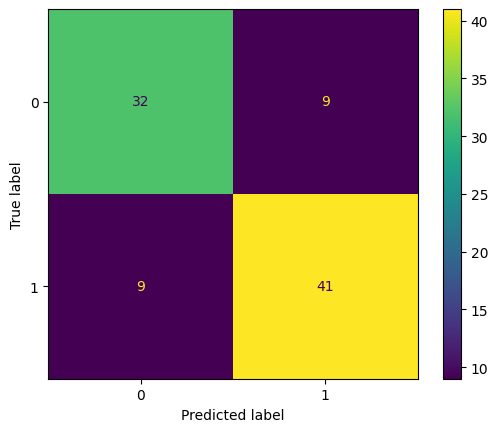

In [11]:
#confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_pred)

display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()

# Assuming binary classification (0 and 1)
#TP = np.sum((y_true==1)&(y_pred==1))
#TN = np.sum((y_true==0)& (y_pred==0))
#FP = np.sum((y_true==0)&(y_pred==1))
#FN = np.sum((y_true==1) &(y_pred==0))


#cm = np.array([[TN,FP],
#      [FN,TP]])

Interprating the confusion Matrix
 From our Confusion matrix, our values are as follows:
*   TN = 41
*   FN = 9
*   TN = 32
*   FN = 9



# **Evaluation Metrics**

- Evaluation matrix is used to quantify the performance of classifiers( whether someone falls in one class or not) eg male or female, ushroom being edible or poisonous etc.

- Unline the linear regression where we evaluated our models using RSME, MAE, MSE, in logistic regression we evaluate using PRECISION, RECALL, ACCURACY AND F1 SCORE.

- Precision answers the questions, **"How many of the selected items are relevant?"**

_ Recall answers the question, **"How many of the selected items are relevant?"**

( Using the mushroom dataset, out of all the mushrooms that the model predicted to be poisonous, what percentage of them did the model corrctlt identify?)

- Precision= TP/(TP + FP)

- Recall = TP/(TP +FN)

- Accuracy = (TP +TN) / (TP + TN + FP + FN)

- F1_Score = (2 * precision * recall)/ (precision + recall)

- F1 SCORE represents a harmonic mean of Precision and Recall.
 That F1 SCORE cannot be high withour precision and recall being high.

PRECISION AND RECALL have an invers relationship. As recall goes up, precision goes down.

- F1 score is generally the most used metric for describing the performance of a model. 

- Best metric to use wiill depend on the business case r goals of a model.

- Calculate all models when in doubt. Get Precision, recall, accuracy and f1 -score for your logistic regression, Random Forest, Neural Networks etc

## Calculating accuracy, precision, recall and F1_score

## Write a function to calculate the precision

In [12]:
def precision(y, y_hat):
    y= np.asarray(y)
    y_hat = np.asarray(y_hat)

    # True positives= both true and predicted positive
    tp = np.sum((y==1)& (y_hat == 1))

    #false positive= true negative but predicted postive
    fp = np.sum((y==0) & (y_hat ==1))
    return tp /(tp+fp) if (tp+fp)>0 else 0.0

print(f"Precision:{precision(y_test,y_pred):.3f}")

Precision:0.820


## Write a function to calculate the recall

In [13]:
def recall(y, y_hat):
    y= np.asarray(y)
    y_hat = np.asarray(y_hat)

    # True positives= both true and predicted positive
    tp = np.sum((y==1)& (y_hat == 1))

    #false negative= true negative but predicted postive
    fn = np.sum((y==1) & (y_hat ==0))
    return tp /(tp+fn) if (tp+fn) > 0 else 0.0

print(f"Recall:{recall(y_test,y_pred):.3f}")

Recall:0.820


## Write a function to calculate the accuracy

In [14]:
def accuracy(y, y_hat):
    y= np.asarray(y)
    y_hat = np.asarray(y_hat)

    # True positives= both true and predicted positive
    tp = np.sum((y==1)& (y_hat == 1))

    #false negative= true negative but predicted postive
    fn = np.sum((y==1) & (y_hat ==0))

    # True negatives = both true and predicted negatives
    tn = np.sum((y==0)& (y_hat == 0))

    #false negative= true negative but predicted postive
    fp = np.sum((y==0) & (y_hat ==1))
    
    total= tp+tn+fp+fn
    return (tp+tn) /(total) if total > 0 else 0.0

print(f"Accuracy:{accuracy(y_test,y_pred):.23}")

Accuracy:0.80219780219780223440296


## Calculate the precision, recall, accuracy, and F1 score of your classifier 

Do this for both the training and test sets. 

In [15]:
# Your code here
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score   # optional fallback


y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)
# ───────────────────────────────────────────────
# 1. Get predictions for both train and test sets
# ───────────────────────────────────────────────
#y_hat_train = model.predict(X_train)
#y_hat_test  = model.predict(X_test)

# If your model outputs probabilities and you want custom threshold (optional)
# y_train_pred = (model.predict_proba(X_train)[:, 1] >= 0.5).astype(int)
# y_test_pred  = (model.predict_proba(X_test)[:, 1] >= 0.5).astype(int)

# ───────────────────────────────────────────────
# 2. Calculate metrics using your custom functions
# ───────────────────────────────────────────────
print("Training Set Metrics:")
print(f"Accuracy:  {accuracy(y_train,  y_hat_train):.4f}")
print(f"Precision: {precision(y_train, y_hat_train):.4f}")
print(f"Recall:    {recall(y_train,   y_hat_train):.4f}")
print(f"F1-score:  {f1_score(y_train, y_hat_train):.4f}")
print("-" * 40)

print("Test Set Metrics:")
print(f"Accuracy:  {accuracy(y_test,   y_hat_test):.4f}")
print(f"Precision: {precision(y_test,  y_hat_test):.4f}")
print(f"Recall:    {recall(y_test,    y_hat_test):.4f}")
print(f"F1-score:  {f1_score(y_test,  y_hat_test):.4f}")

Training Set Metrics:
Accuracy:  0.8726
Precision: 0.8667
Recall:    0.9043
F1-score:  0.8851
----------------------------------------
Test Set Metrics:
Accuracy:  0.8022
Precision: 0.8200
Recall:    0.8200
F1-score:  0.8200


Done